# 국가별/상품군별 온라인 쇼핑 해외직접판매액

# 가설 - K-beauty는 성장하고 있을까?, 해외직접판매는 어느 국가를 선택하는 것이 좋을까?
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

# 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# MAC 한글폰트 설정
sns.set(font='AppleGothic')

# 글씨를 선명하게 하기위해
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [8]:
df_raw = pd.read_csv('data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221108190528.csv', encoding='cp949')
df_raw.shape

(450, 37)

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   국가(대륙)별   450 non-null    object
 1   상품군별      450 non-null    object
 2   판매유형별     450 non-null    object
 3   2014.1/4  450 non-null    object
 4   2014.2/4  450 non-null    object
 5   2014.3/4  450 non-null    object
 6   2014.4/4  450 non-null    object
 7   2015.1/4  450 non-null    object
 8   2015.2/4  450 non-null    object
 9   2015.3/4  450 non-null    object
 10  2015.4/4  450 non-null    object
 11  2016.1/4  450 non-null    object
 12  2016.2/4  450 non-null    object
 13  2016.3/4  450 non-null    object
 14  2016.4/4  450 non-null    object
 15  2017.1/4  450 non-null    int64 
 16  2017.2/4  450 non-null    int64 
 17  2017.3/4  450 non-null    int64 
 18  2017.4/4  450 non-null    int64 
 19  2018.1/4  450 non-null    int64 
 20  2018.2/4  450 non-null    int64 
 21  2018.3/4  450 no

In [12]:
# 국가별 데이터 빈도수 확인
df_raw['국가(대륙)별'].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [15]:
# 미국데이터만 따로보기
df_raw[df_raw['국가(대륙)별'] == '미국'].head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,49162,66097,67920,73390,72577,70460,69519,67036,51399,52364
46,미국,합계,면세점,-,-,-,-,-,-,-,...,698,339,81,67,56,1742,107,108,127,220
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,48464,65758,67839,73323,72521,68718,69412,66928,51272,52144
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,1182,1631,1871,1373,1644,2118,1535,731,655,685
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0


# 분석과 시각화를 위한 tidy data 만들기

In [17]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4', '2020.1/4', '2020.2/4', '2020.3/4',
       '2020.4/4', '2021.1/4', '2021.2/4', '2021.3/4', '2021.4/4', '2022.1/4',
       '2022.2/4'],
      dtype='object')

In [18]:
# pd.melt(df)은 열을 행으로 재가공할 수 있다.
df = df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], var_name='기간', value_name='million')
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-
...,...,...,...,...,...
15295,기타,생활용품 및 자동차용품,면세점,2022.2/4,0
15296,기타,생활용품 및 자동차용품,면세점 이외,2022.2/4,168
15297,기타,기 타,계,2022.2/4,725
15298,기타,기 타,면세점,2022.2/4,0


# 데이터 전처리

## 기간에서 연도를 분리하기

In [32]:
df['연도'] = df['기간'].map(lambda x : int(x.split('.')[0]))
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014
...,...,...,...,...,...,...
15295,기타,생활용품 및 자동차용품,면세점,2022.2/4,0,2022
15296,기타,생활용품 및 자동차용품,면세점 이외,2022.2/4,168,2022
15297,기타,기 타,계,2022.2/4,725,2022
15298,기타,기 타,면세점,2022.2/4,0,2022


In [35]:
# 기간에서 분기만 분리하기
df['분기'] = df['기간'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1
...,...,...,...,...,...,...,...
15295,기타,생활용품 및 자동차용품,면세점,2022.2/4,0,2022,2
15296,기타,생활용품 및 자동차용품,면세점 이외,2022.2/4,168,2022,2
15297,기타,기 타,계,2022.2/4,725,2022,2
15298,기타,기 타,면세점,2022.2/4,0,2022,2


## 금액을 수치데이터로 표현하기 위하여 데이터 타입변경

In [39]:
# - 문자를 결측치로 변경하고, float 타입으로 변경
df['million'] = df['million'].replace('-', np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


## 필요없는 데이터 제거하기

In [43]:
# 합계 데이터는 별도 계산이 가능하기 때문에 전체 데이터셋에서 제거
df = df[(df['국가(대륙)별'] != '합계') &
  (df['상품군별'] !='합계') & 
  (df['판매유형별'] !='계')].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
15293,기타,농축수산물,면세점 이외,2022.2/4,0.0,2022,2
15295,기타,생활용품 및 자동차용품,면세점,2022.2/4,0.0,2022,2
15296,기타,생활용품 및 자동차용품,면세점 이외,2022.2/4,168.0,2022,2
15298,기타,기 타,면세점,2022.2/4,0.0,2022,2


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8568 entries, 49 to 15299
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  8568 non-null   object 
 1   상품군별     8568 non-null   object 
 2   판매유형별    8568 non-null   object 
 3   기간       8568 non-null   object 
 4   million  5544 non-null   float64
 5   연도       8568 non-null   int64  
 6   분기       8568 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 535.5+ KB


In [45]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

## 전체 상품군 판매액

<AxesSubplot: xlabel='연도', ylabel='million'>

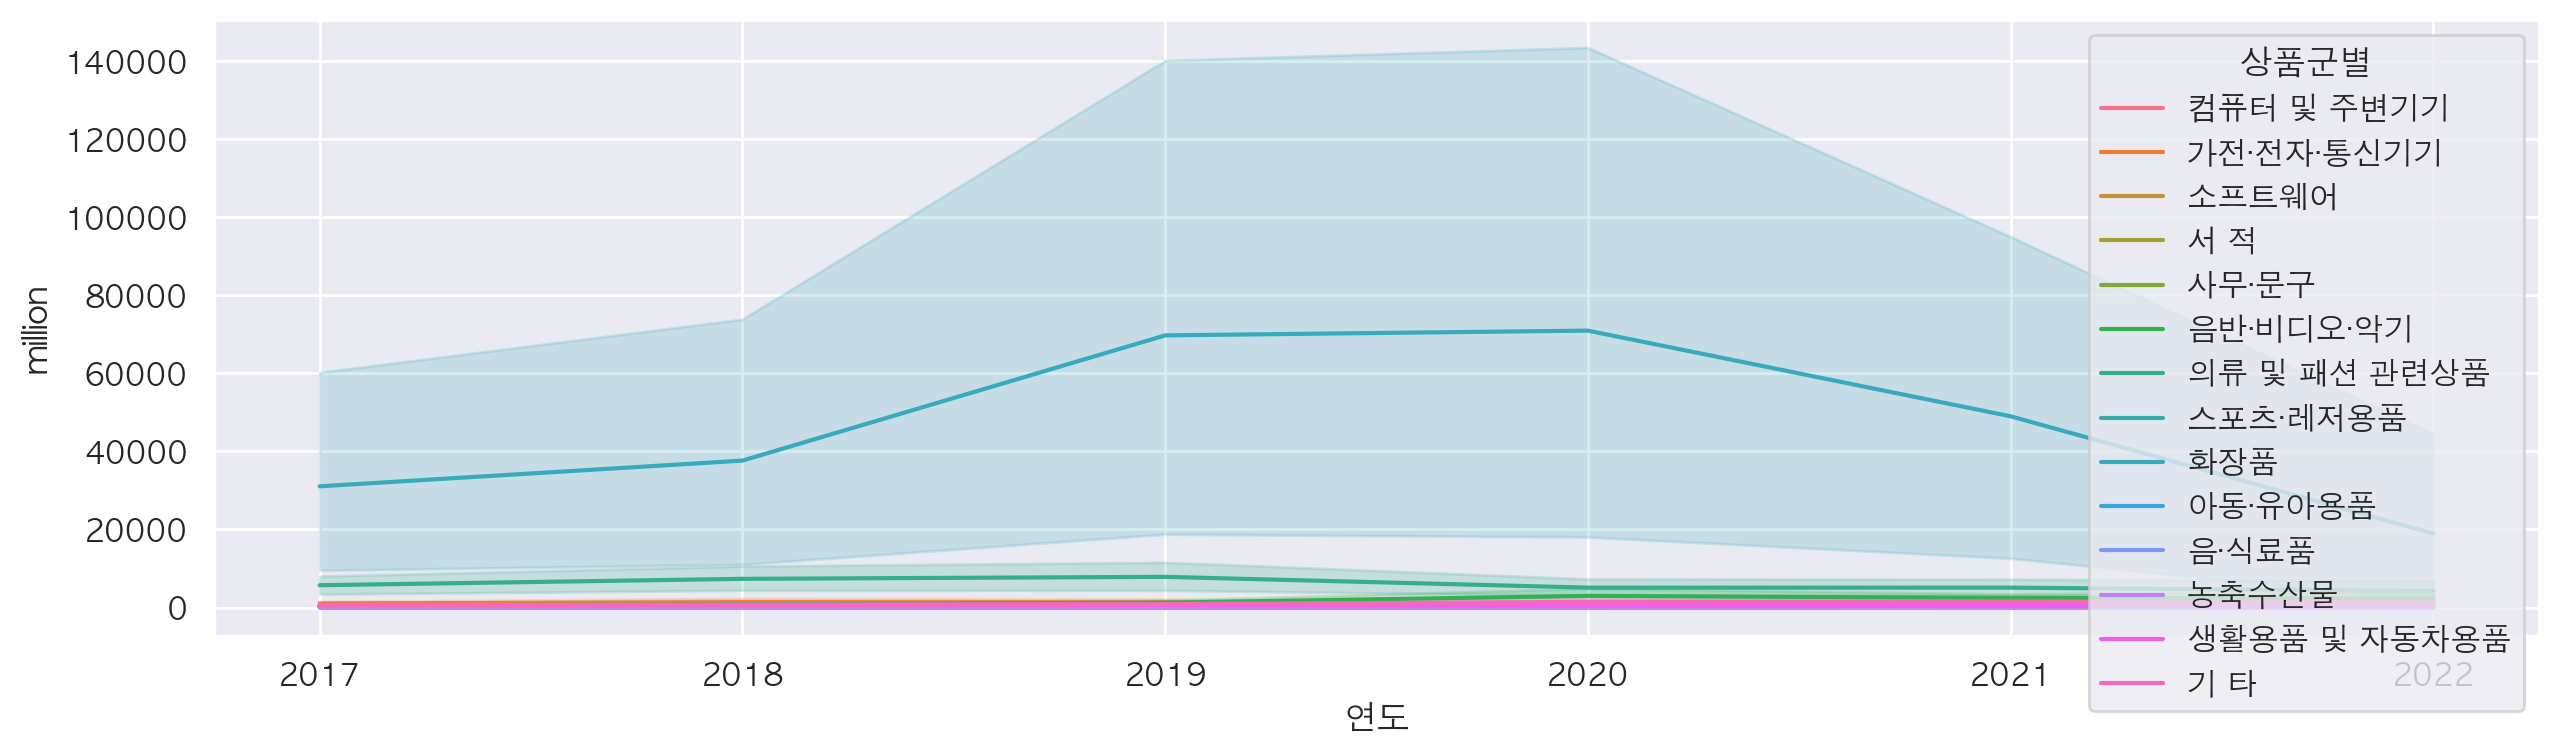

In [52]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x='연도', y='million', hue='상품군별')

<Figure size 1000x400 with 0 Axes>

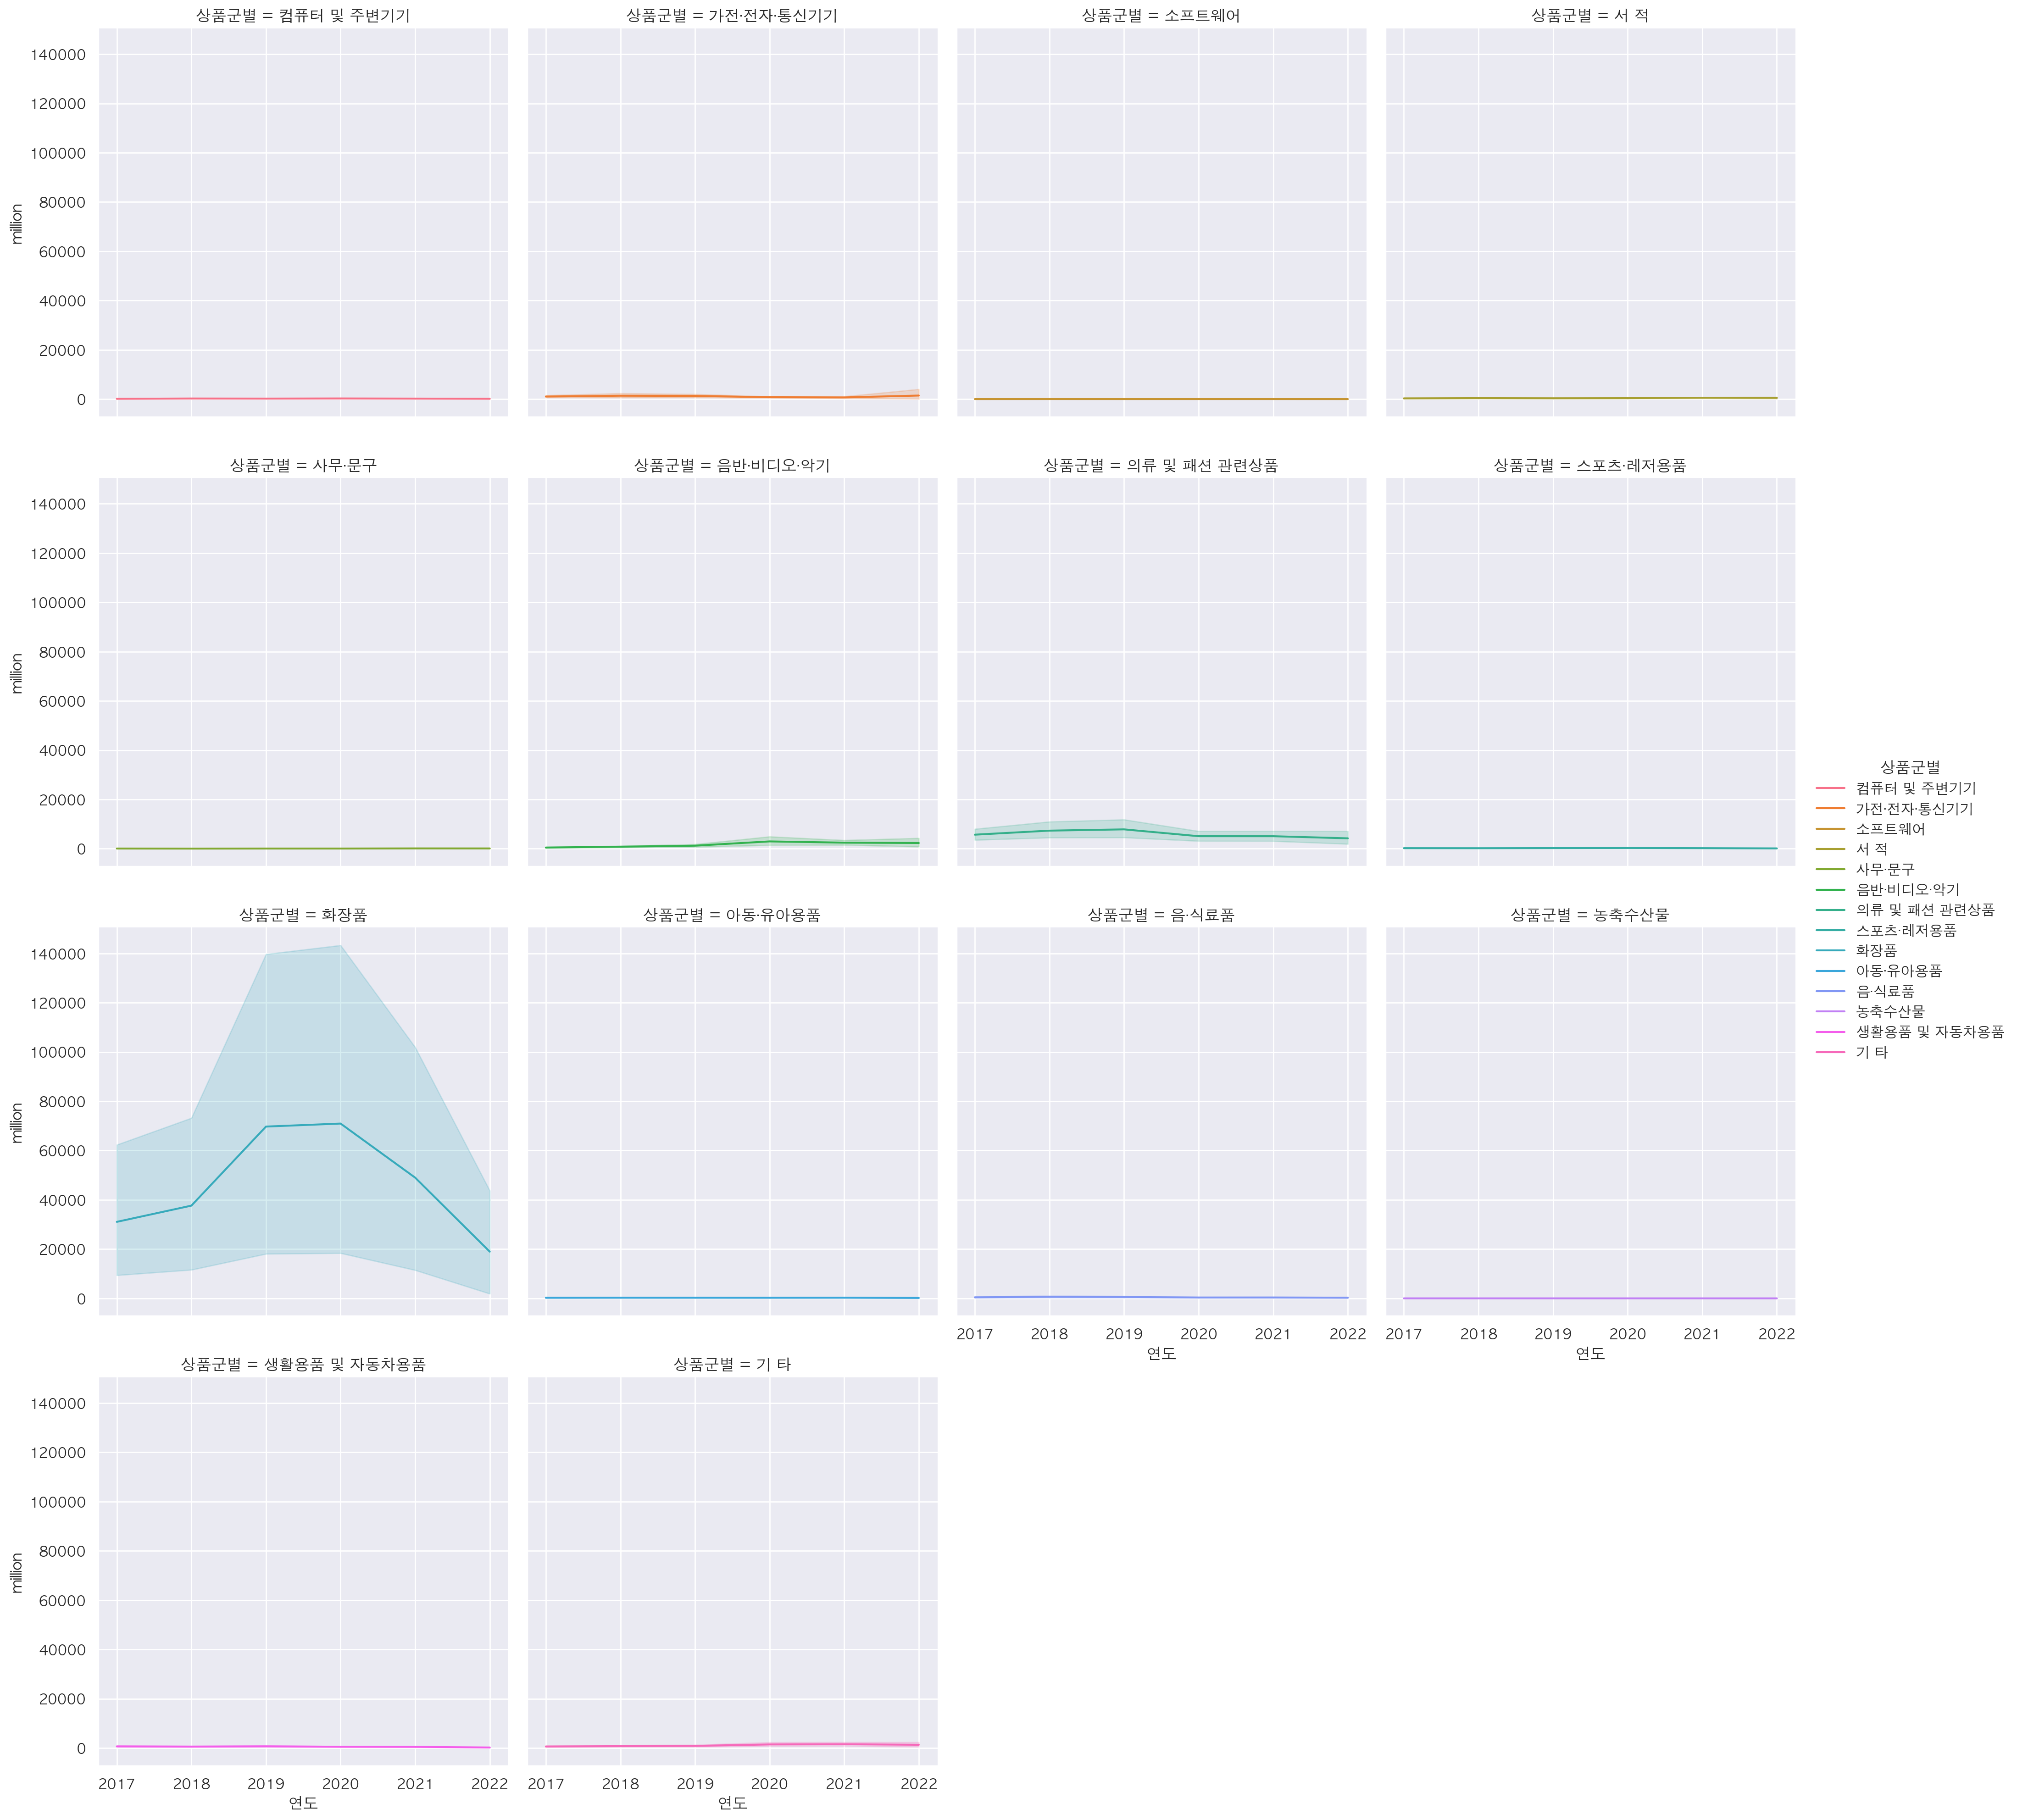

In [57]:
plt.figure(figsize=(10,4))
sns.relplot(data=df, x='연도', y='million', hue='상품군별', kind='line', col='상품군별', col_wrap=4)

In [60]:
# 화장품을 제외한 상품군을 찾기
df_sub = df[~df['상품군별'].isin(['화장품'])]
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
15293,기타,농축수산물,면세점 이외,2022.2/4,0.0,2022,2
15295,기타,생활용품 및 자동차용품,면세점,2022.2/4,0.0,2022,2
15296,기타,생활용품 및 자동차용품,면세점 이외,2022.2/4,168.0,2022,2
15298,기타,기 타,면세점,2022.2/4,0.0,2022,2


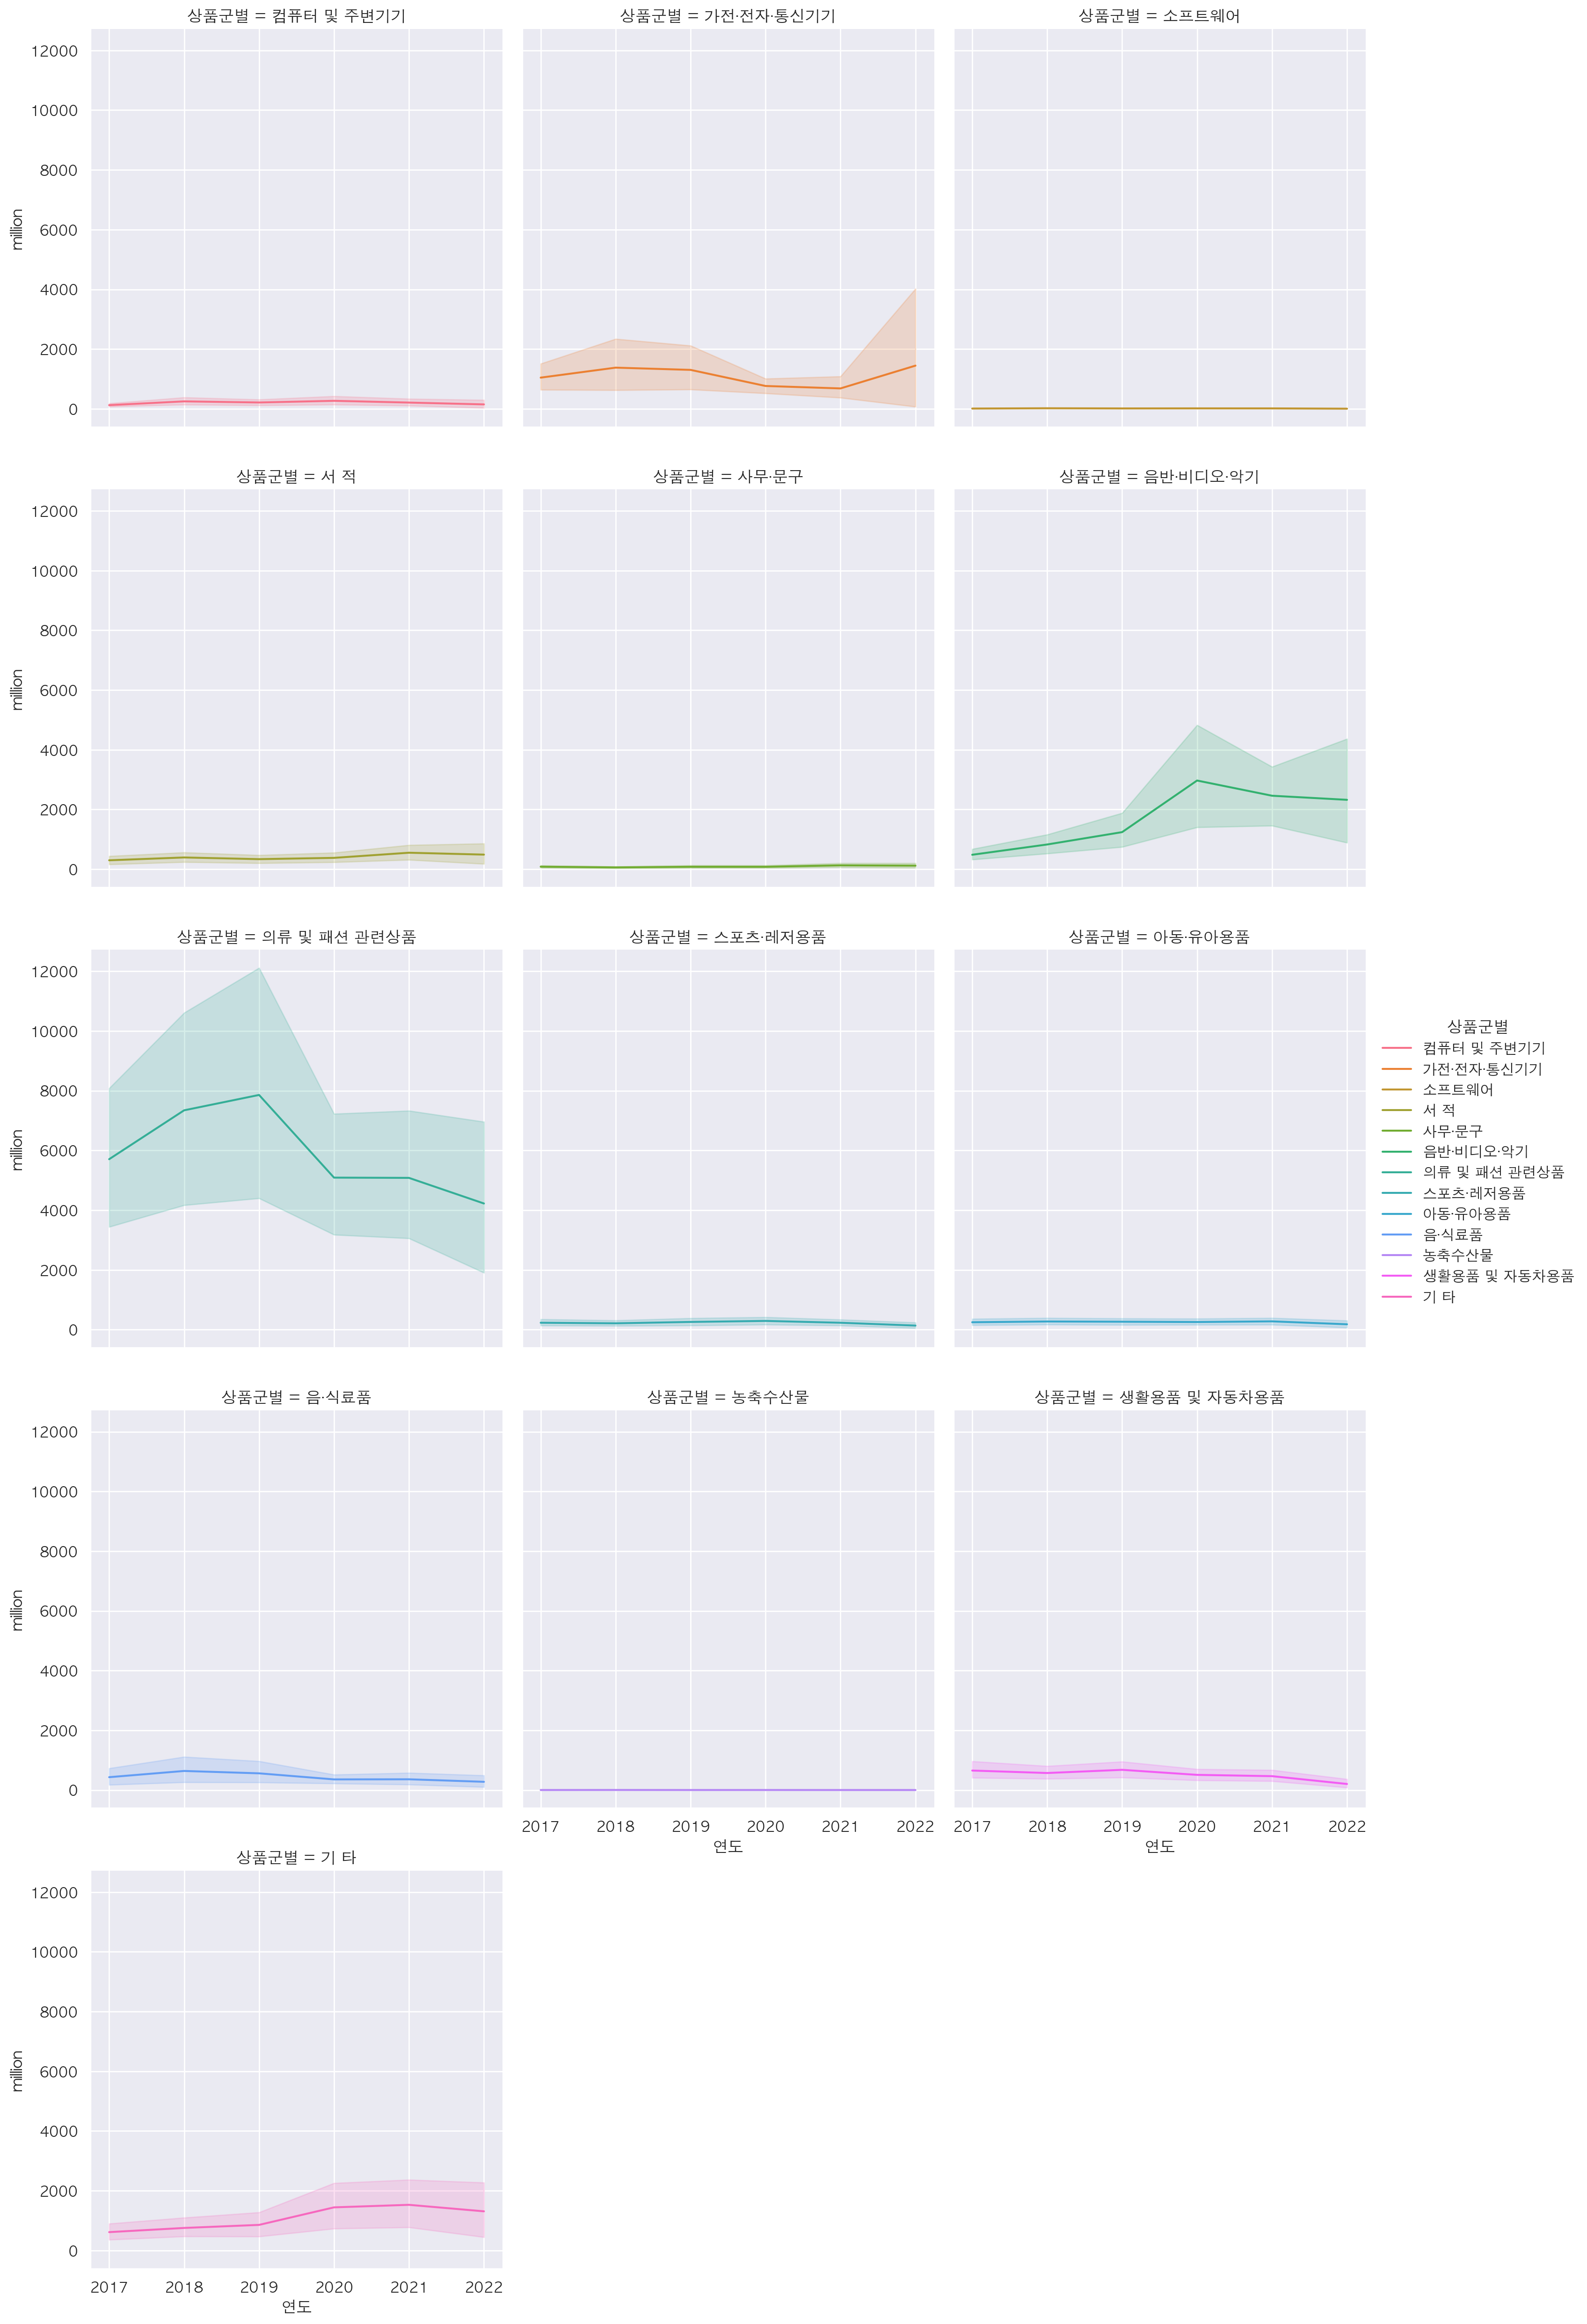

In [62]:
# 화장품을 제외한 상품군을 시각화
sns.relplot(data=df_sub, x='연도', y='million', hue='상품군별', col='상품군별', col_wrap=3, kind='line')

## 화장품의 온라인쇼핑 해외직접판매액

<AxesSubplot: xlabel='연도', ylabel='million'>

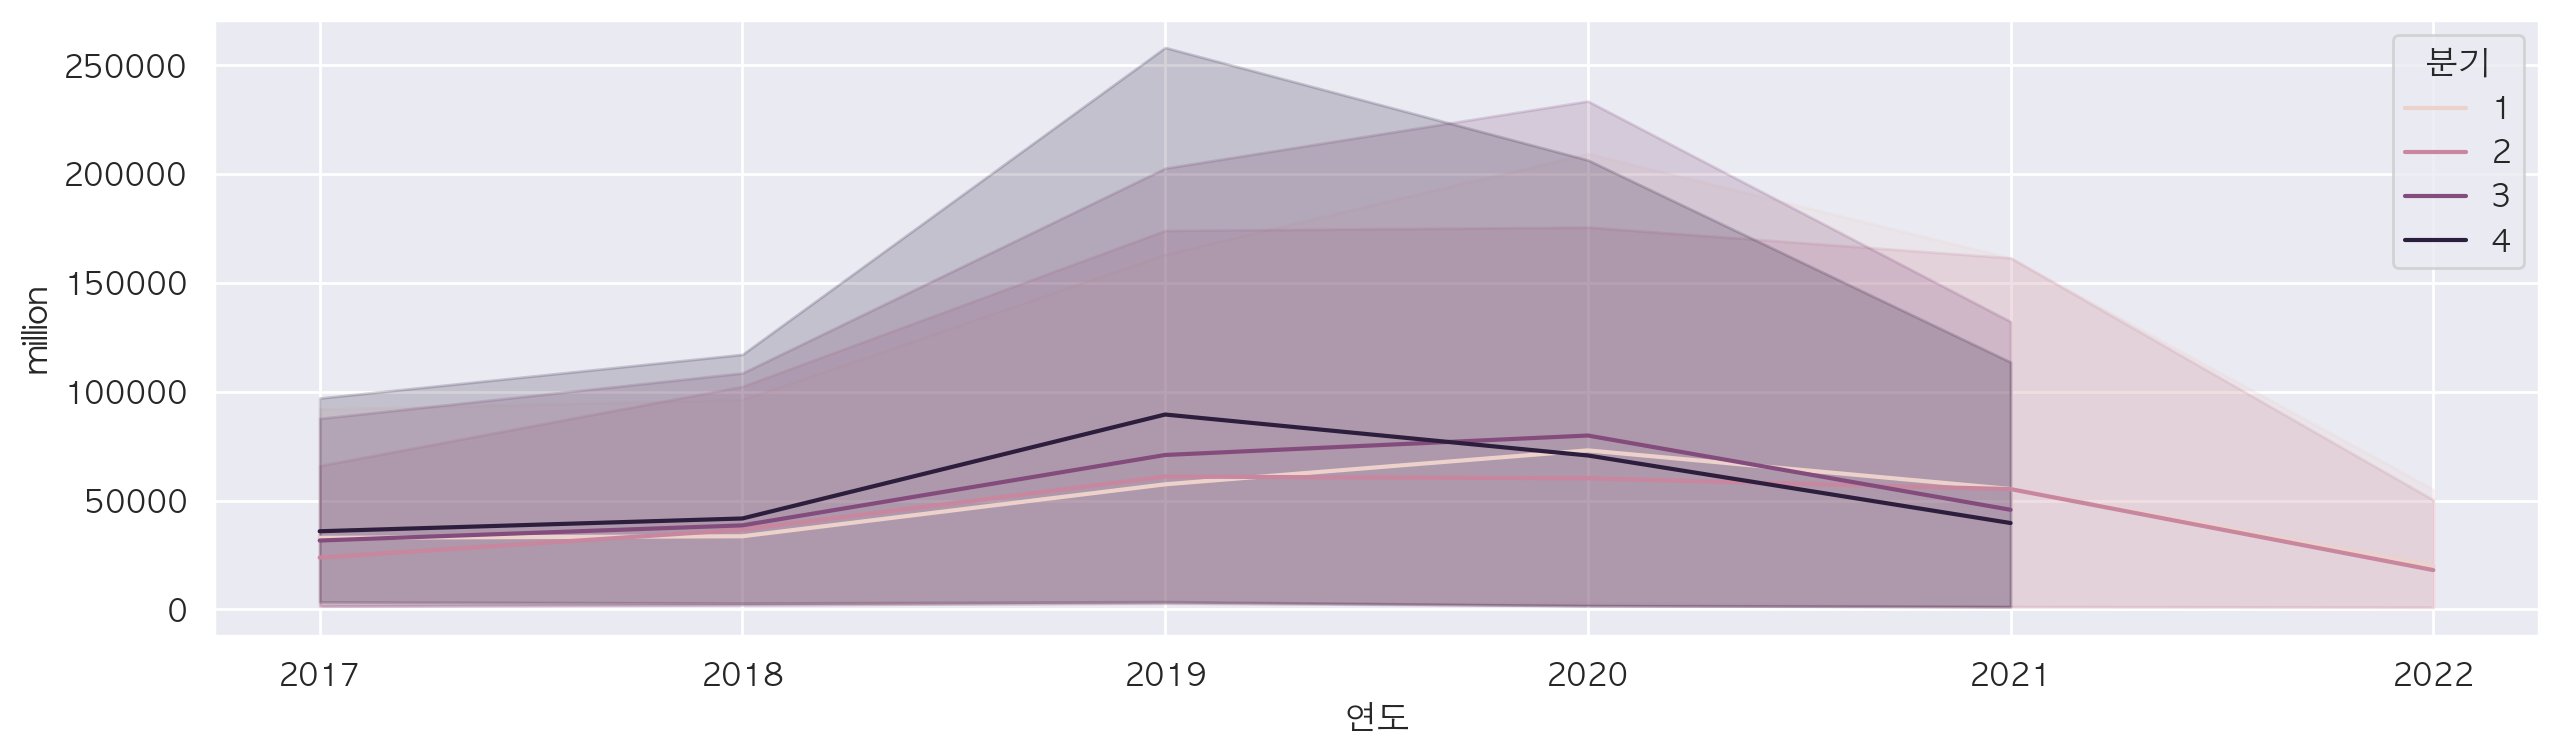

In [67]:
df_cosmetic = df[df['상품군별'] == '화장품']
df_cosmetic
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x='연도', y='million', hue='분기')

<AxesSubplot: xlabel='기간', ylabel='million'>

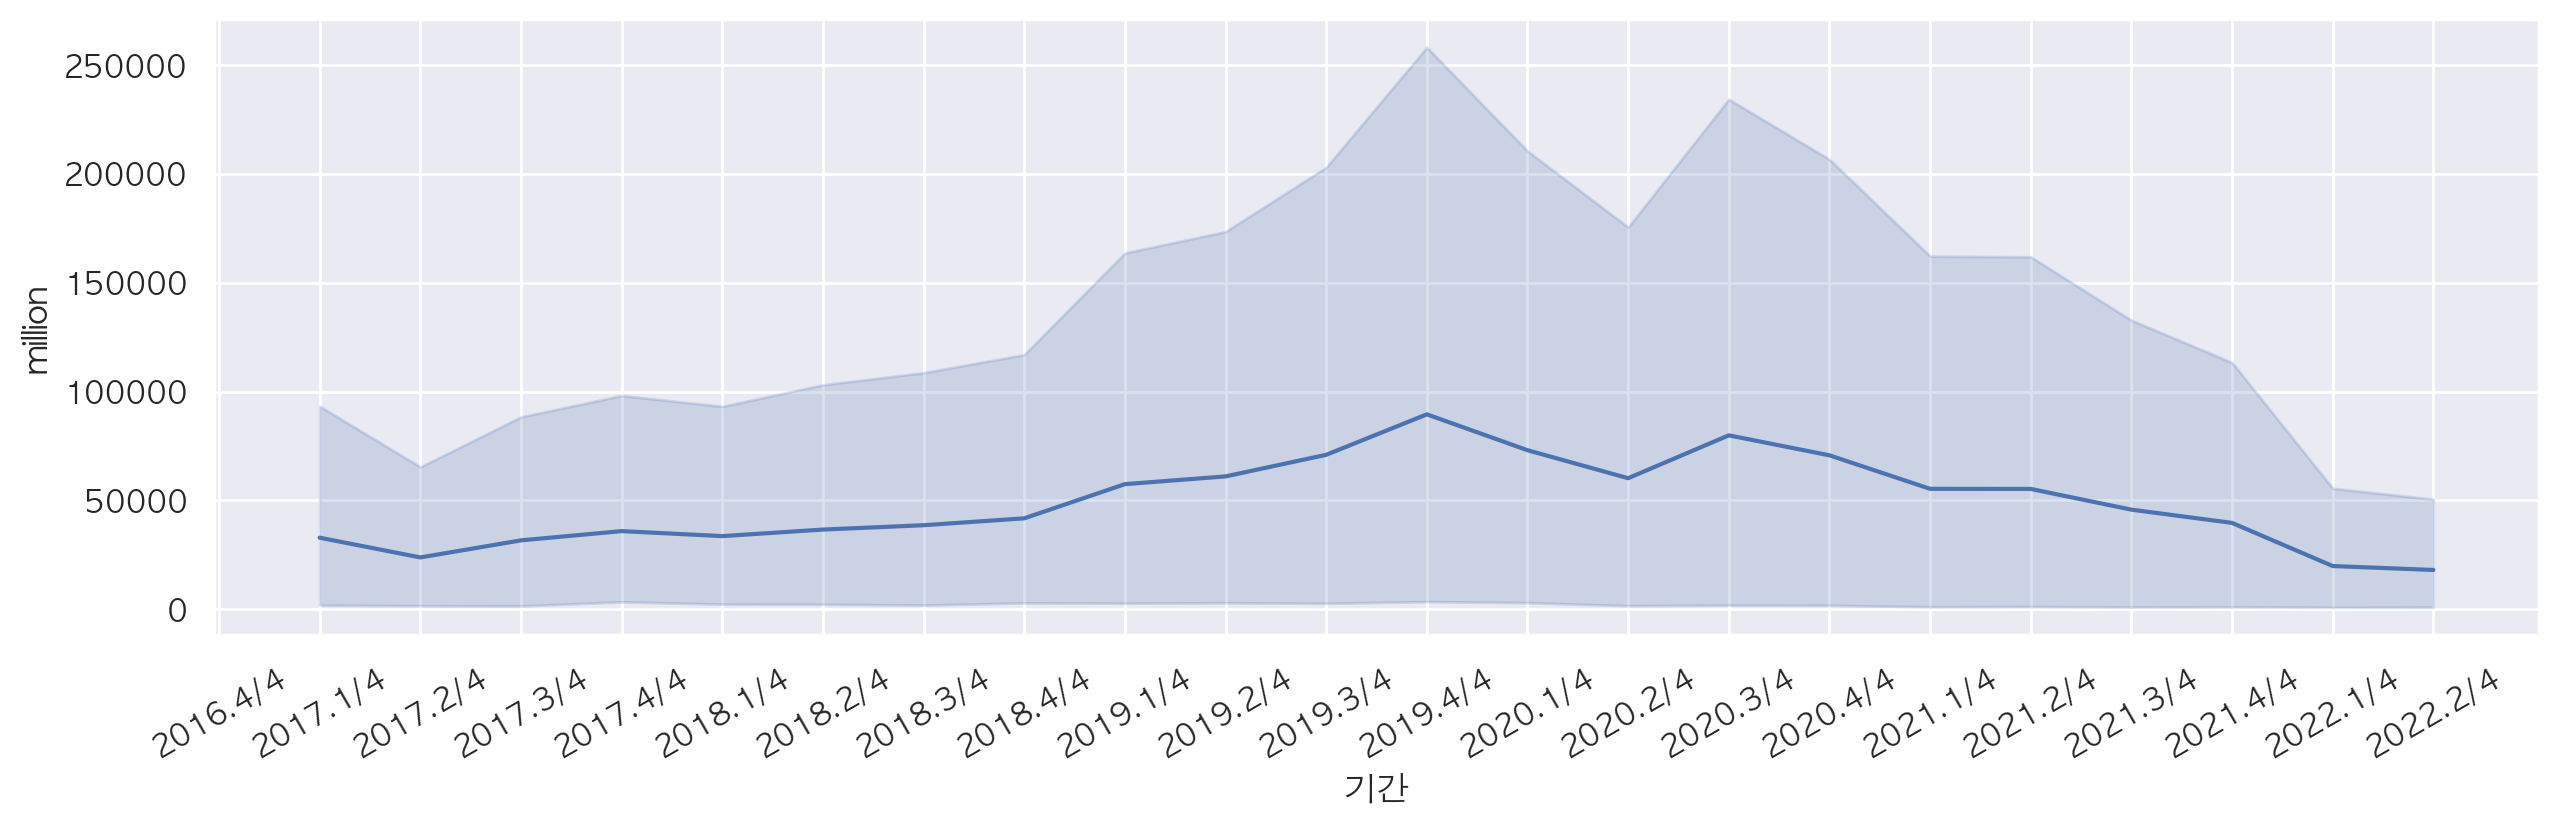

In [68]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million")

<AxesSubplot: xlabel='기간', ylabel='million'>

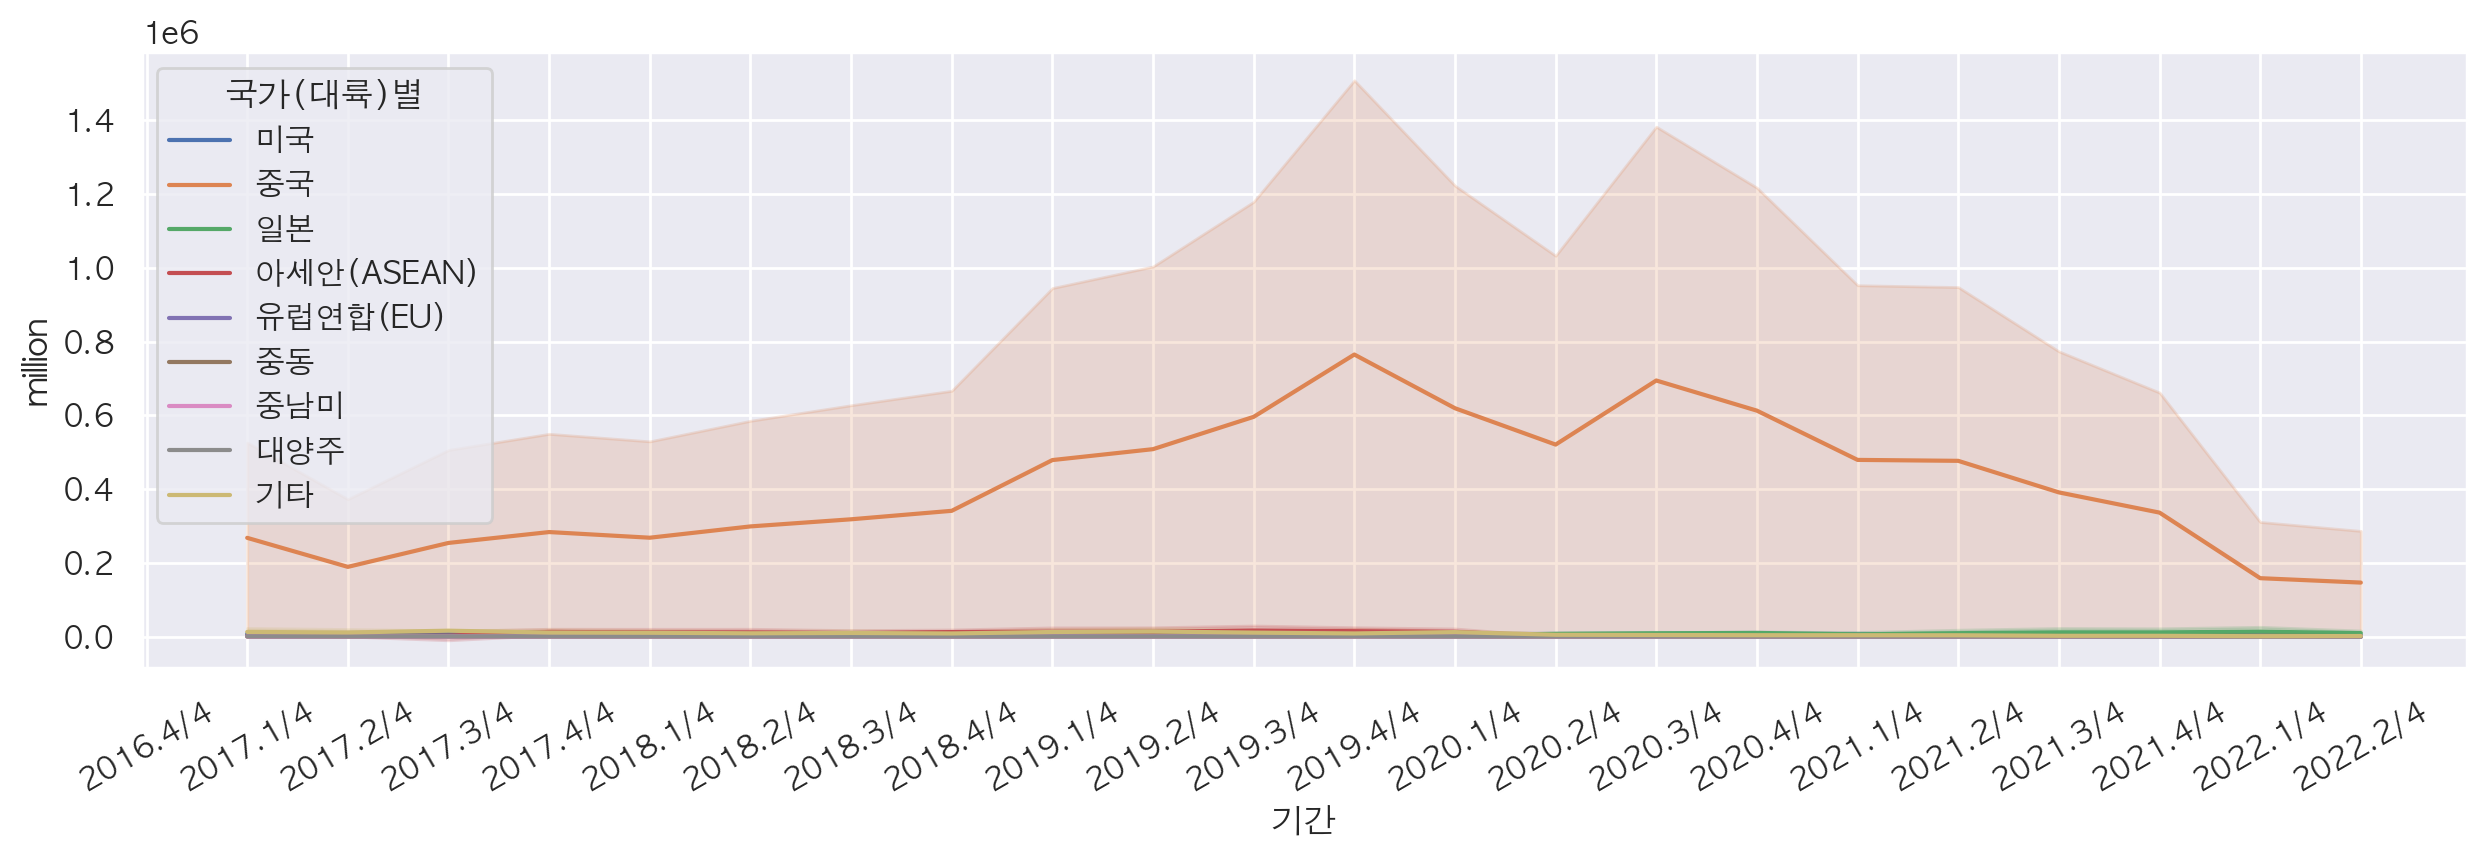

In [69]:
# 국가별 화장품 판매액
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot: xlabel='기간', ylabel='million'>

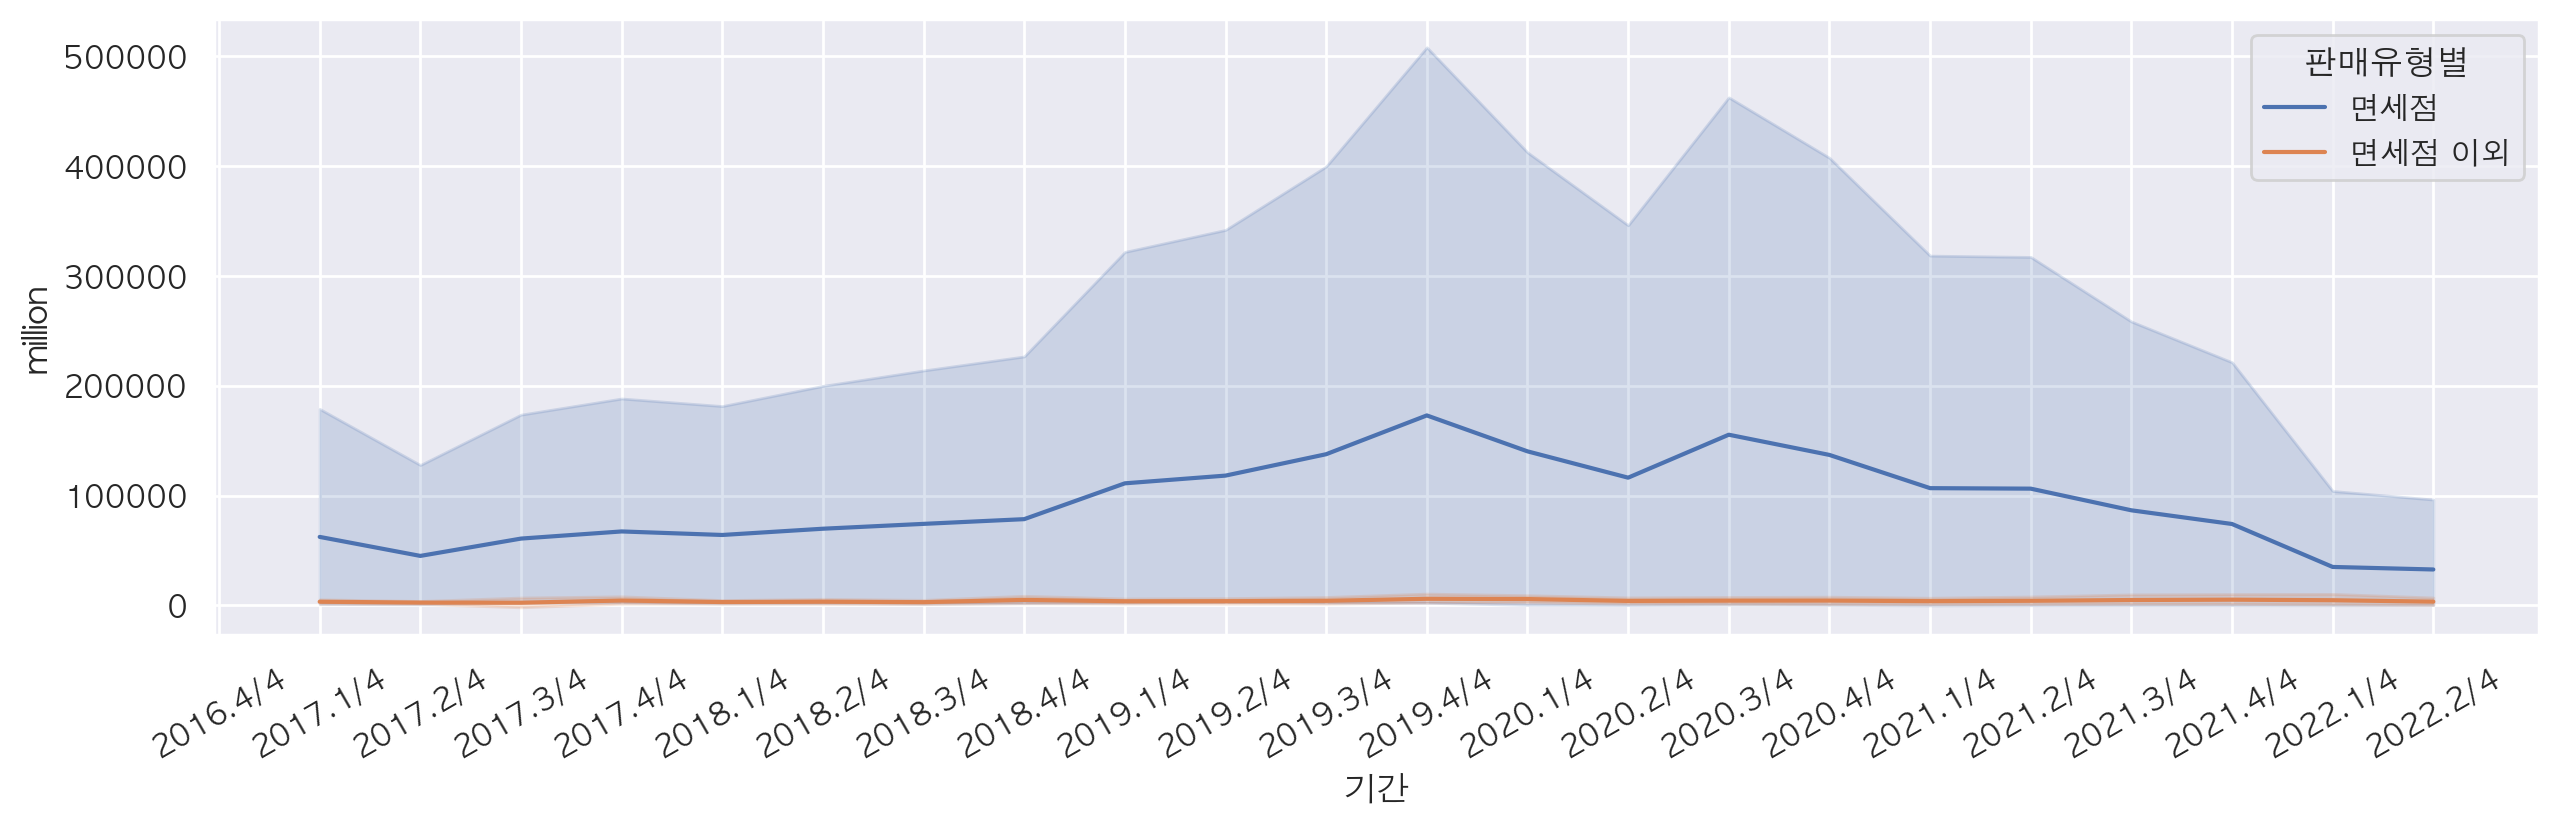

In [83]:
# 판매유형별 화장품 판매액
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="판매유형별")

## 의류 및 패션관련 상품 온라인 쇼핑 해외직접판매액

<AxesSubplot: title={'center': '의류 및 패션관련 상품'}, xlabel='기간', ylabel='million'>

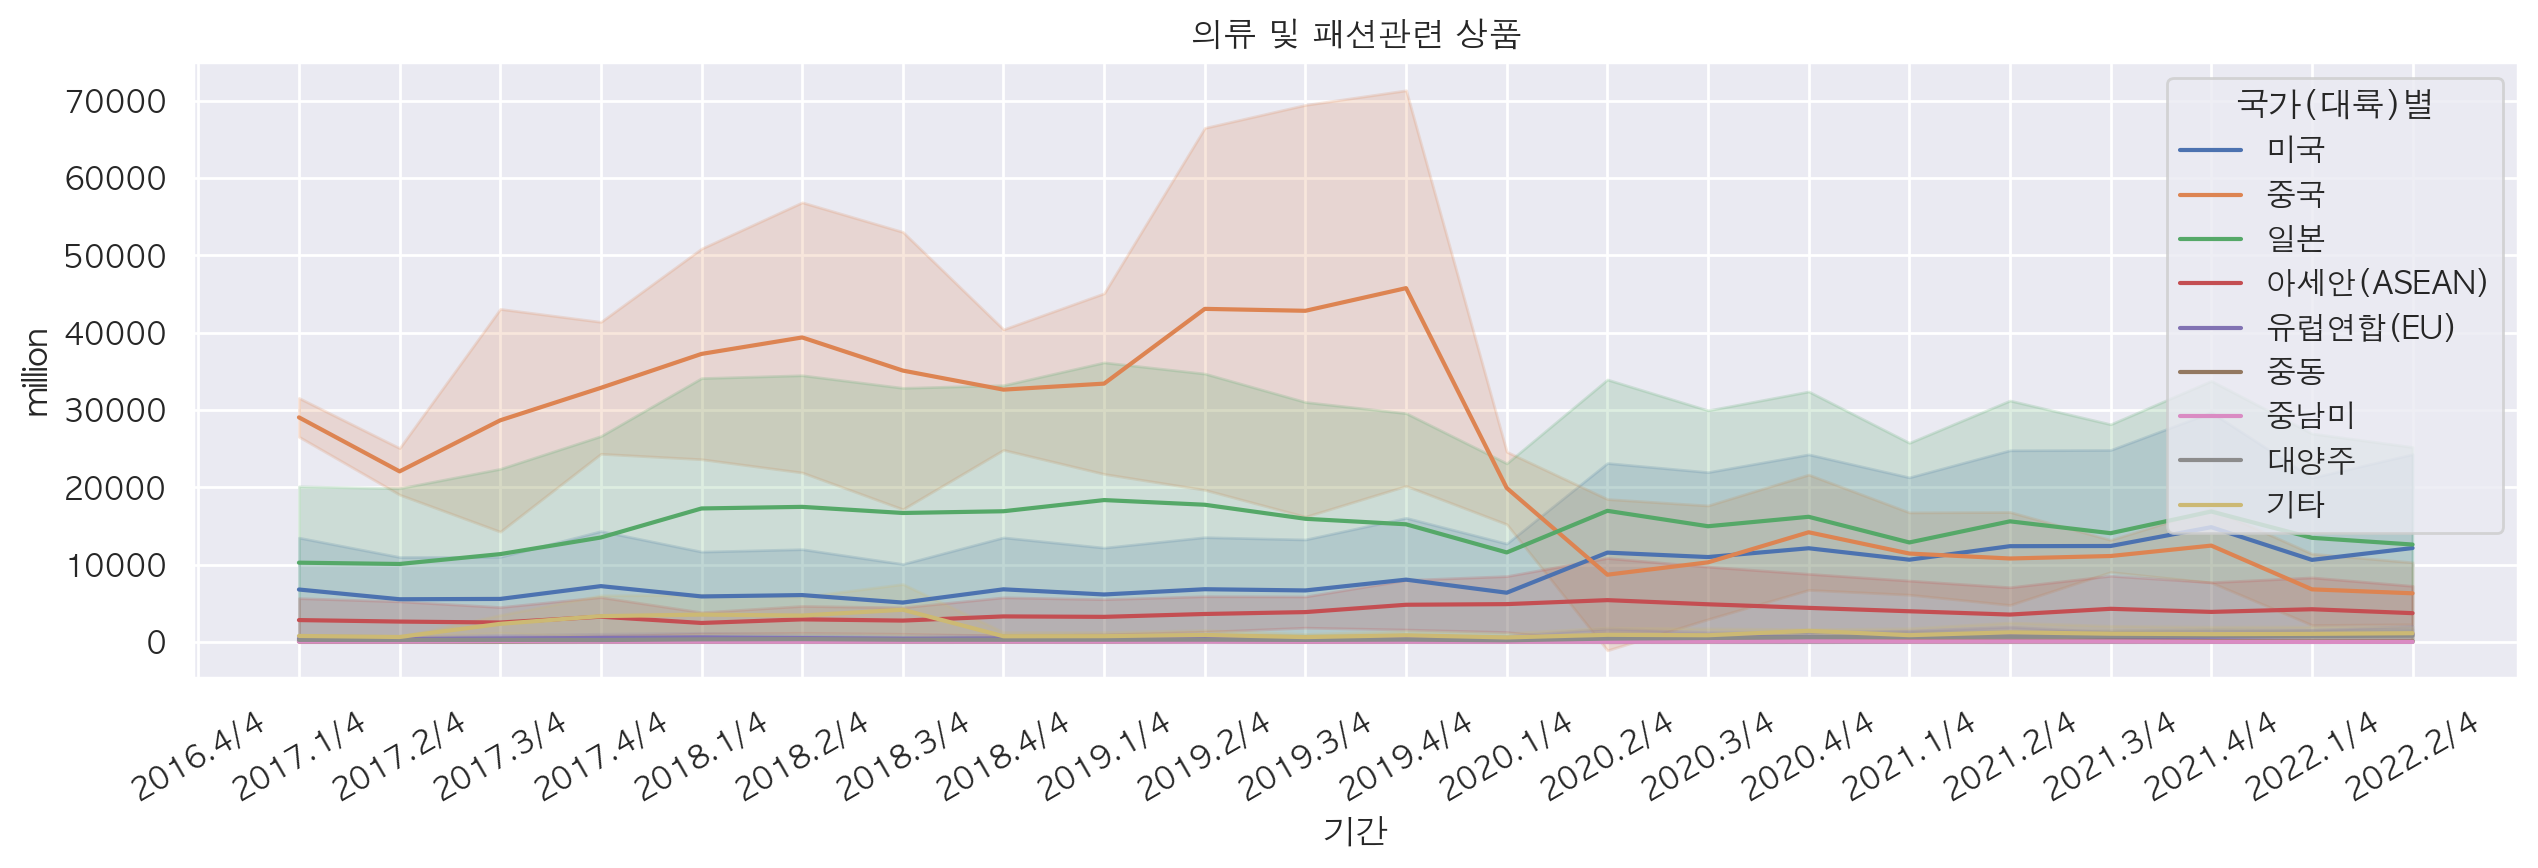

In [86]:
# 국가별 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액
df_fashion = df[df['상품군별'].str.contains('의류')]
plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot: xlabel='기간', ylabel='million'>

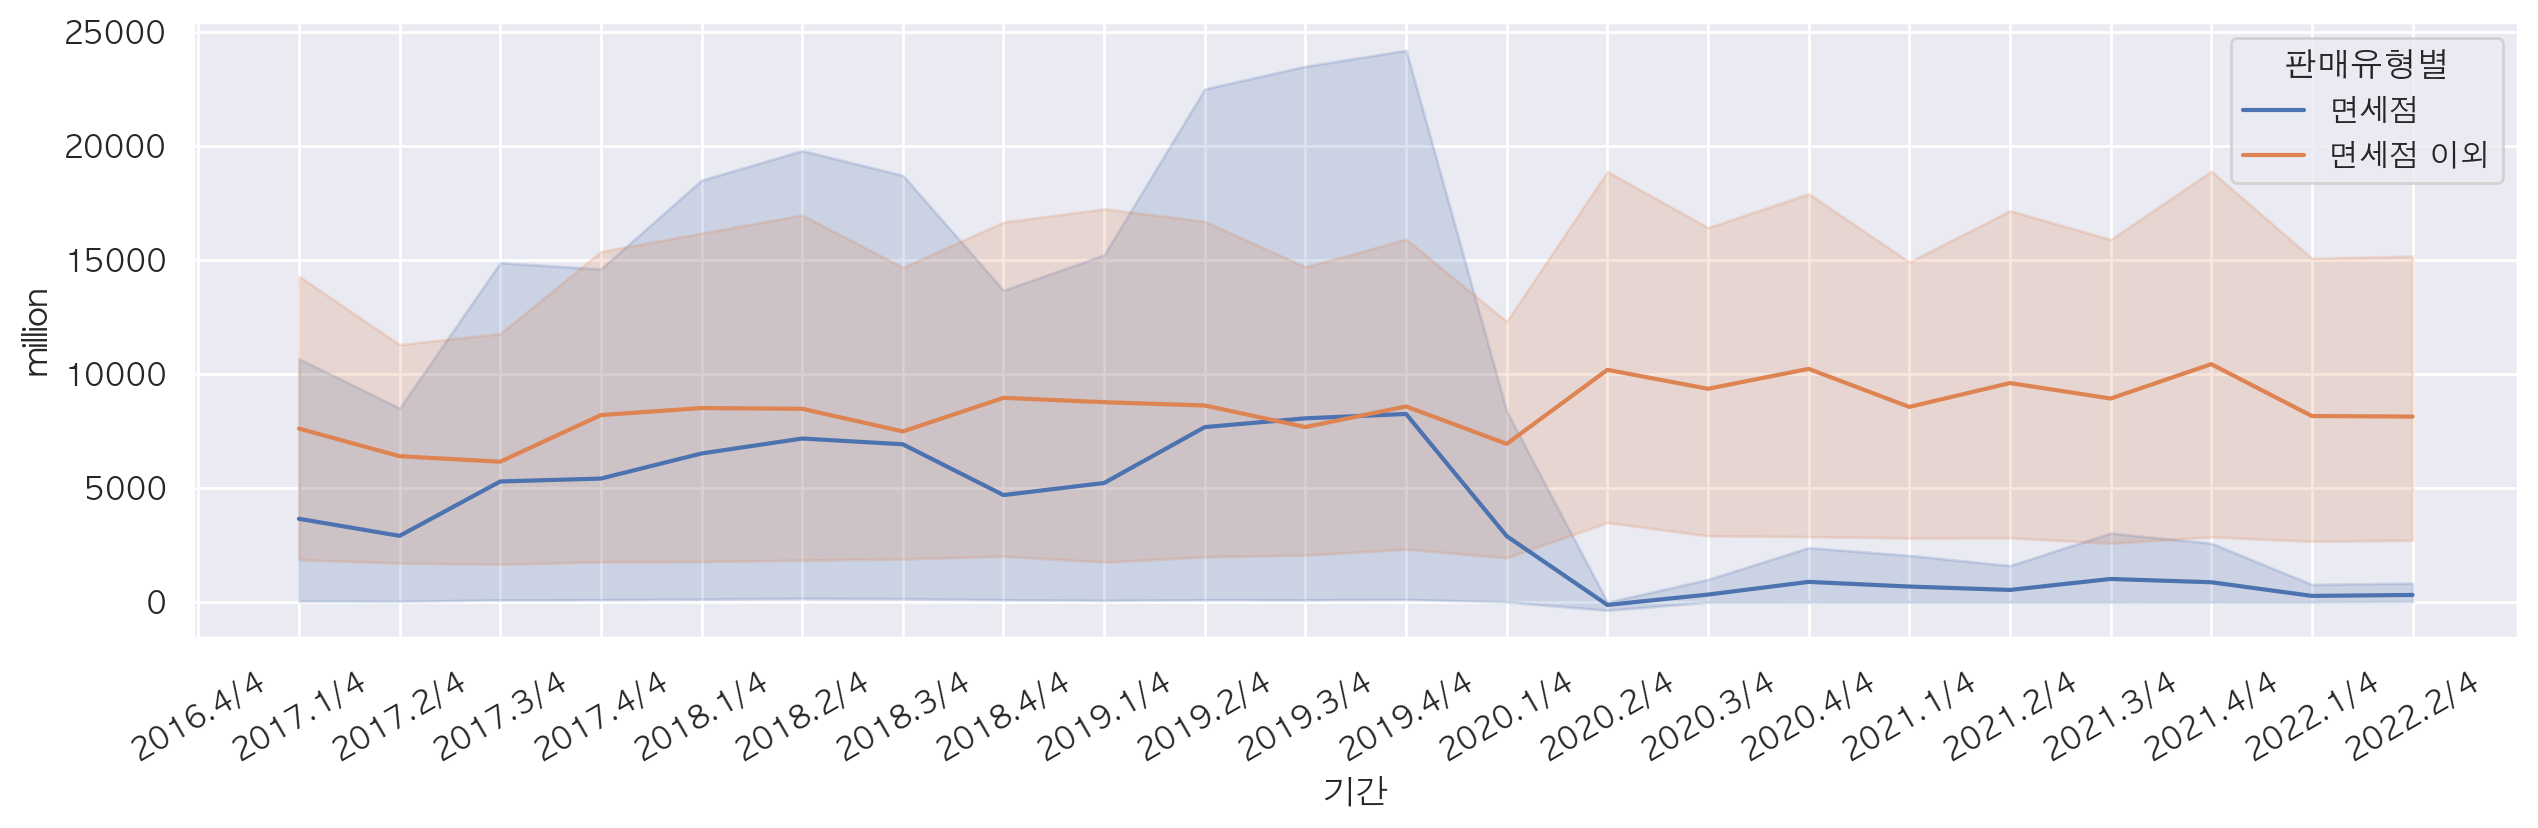

In [87]:
# 판매유형별 의류 및 패션관련 상품 해외직접판매액
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="판매유형별")

## 데이터 집계

In [88]:
pt = df_fashion.pivot_table(index='국가(대륙)별', values='million', columns='연도', aggfunc='sum')
pt

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,,,,
기타,0.0,0.0,0.0,14387.0,23901.0,6475.0,7807.0,8578.0,4450.0
대양주,0.0,0.0,0.0,2266.0,2725.0,2489.0,3749.0,6023.0,3262.0
미국,0.0,0.0,0.0,50353.0,47875.0,55536.0,82207.0,100721.0,45604.0
아세안(ASEAN),0.0,0.0,0.0,22671.0,23068.0,31247.0,39339.0,31549.0,15999.0
유럽연합(EU),0.0,0.0,0.0,3736.0,4114.0,3694.0,5128.0,6225.0,3695.0
일본,0.0,0.0,0.0,90584.0,136800.0,134637.0,119531.0,118967.0,52215.0
중국,0.0,0.0,0.0,225407.0,288848.0,330267.0,106346.0,91770.0,26278.0
중남미,0.0,0.0,0.0,762.0,576.0,544.0,614.0,611.0,131.0
중동,0.0,0.0,0.0,772.0,879.0,951.0,1776.0,1462.0,436.0


<AxesSubplot: xlabel='연도', ylabel='국가(대륙)별'>

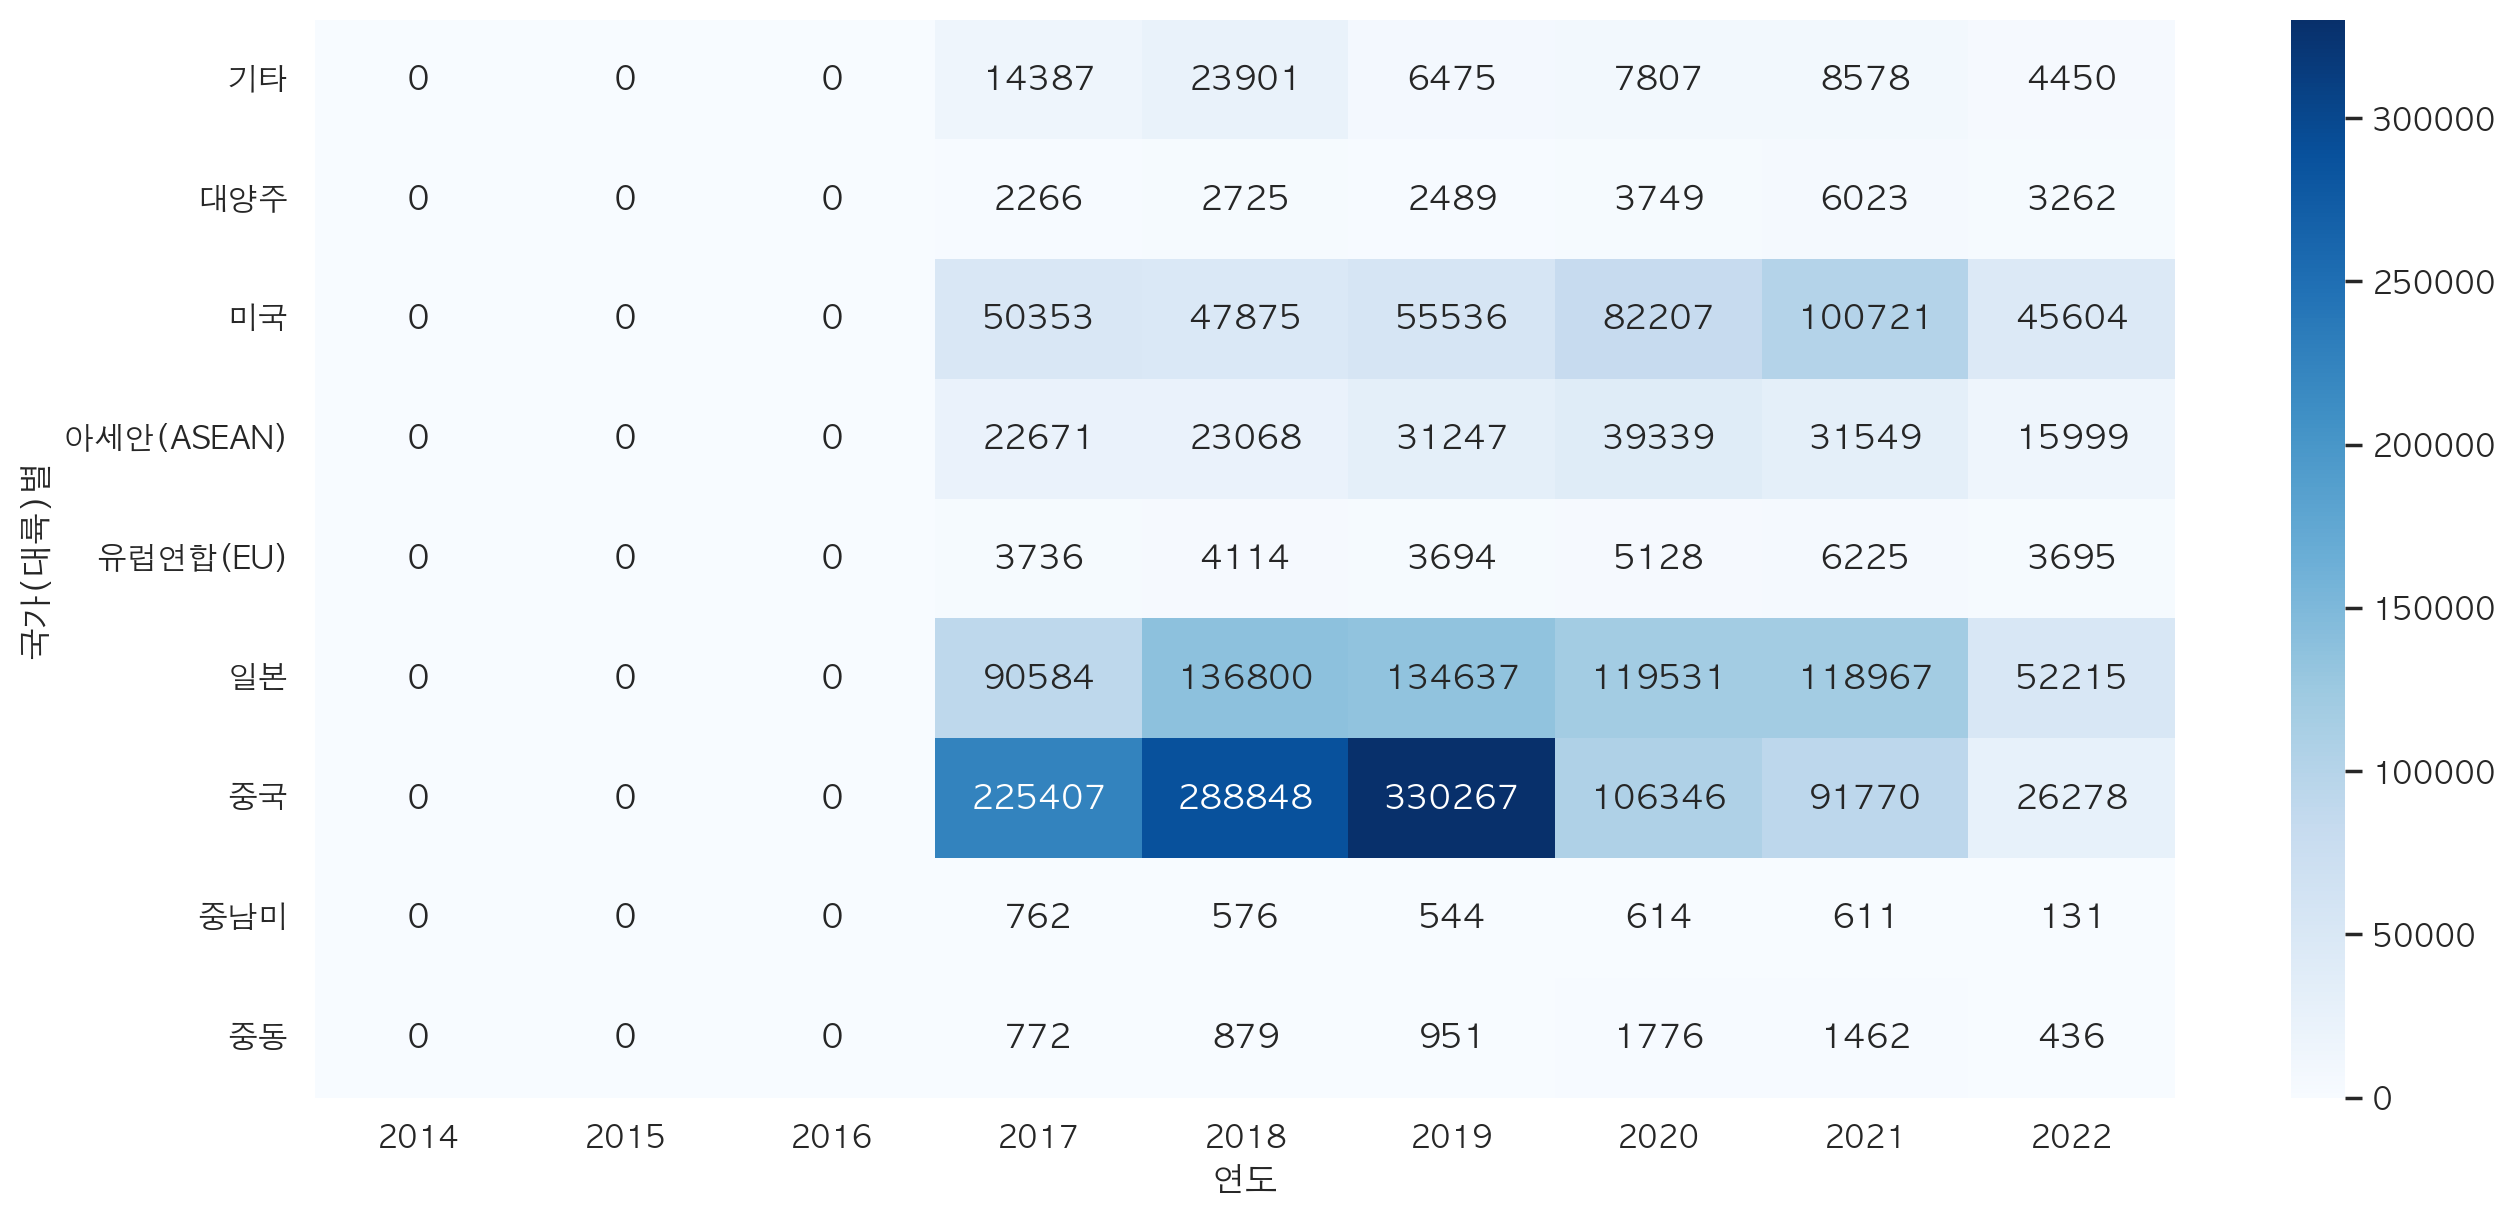

In [89]:
plt.figure(figsize=(15,7))
sns.heatmap(pt, cmap='Blues', annot=True, fmt=".0f")

# 전체 상품군별 온라인쇼핑 해외직접판매액 추이

<AxesSubplot: xlabel='연도', ylabel='million'>

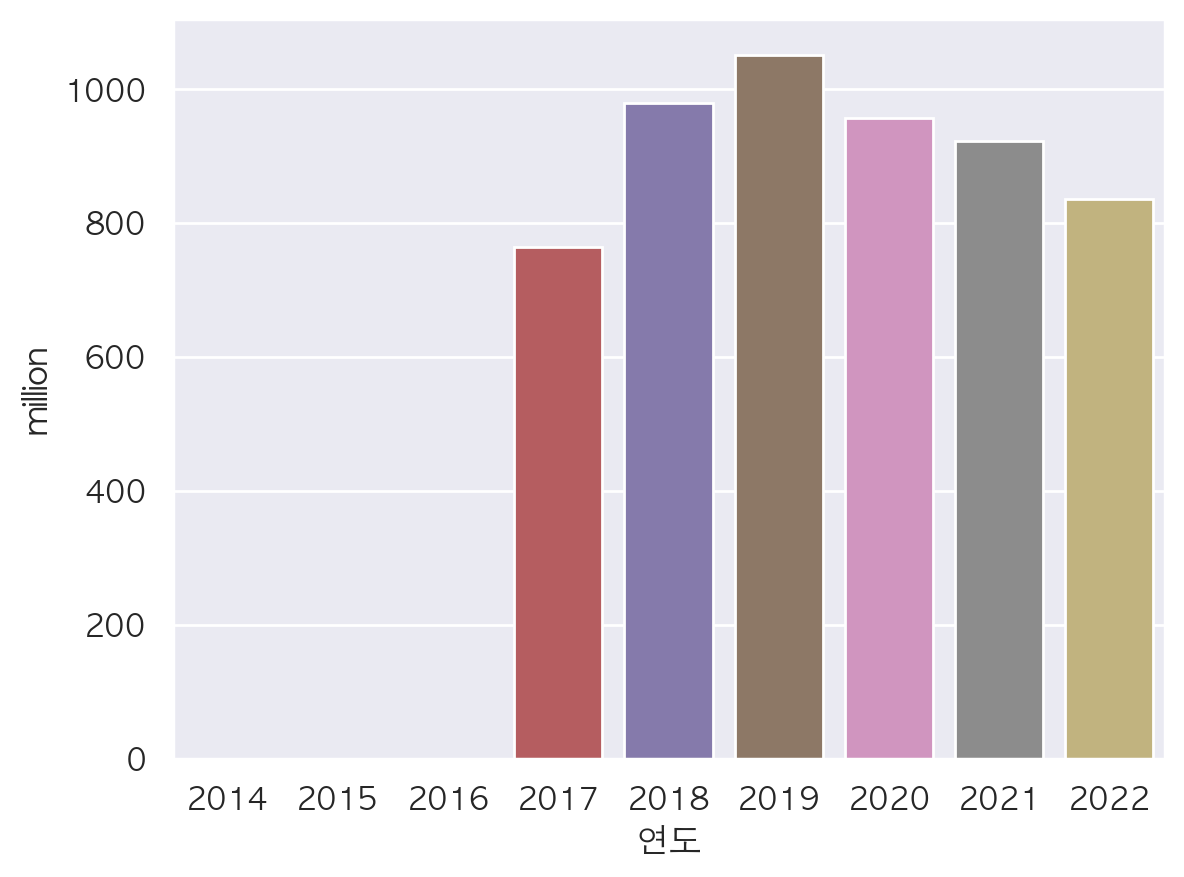

In [93]:
sns.barplot(data=df_sub, x='연도', y='million', errorbar=None)

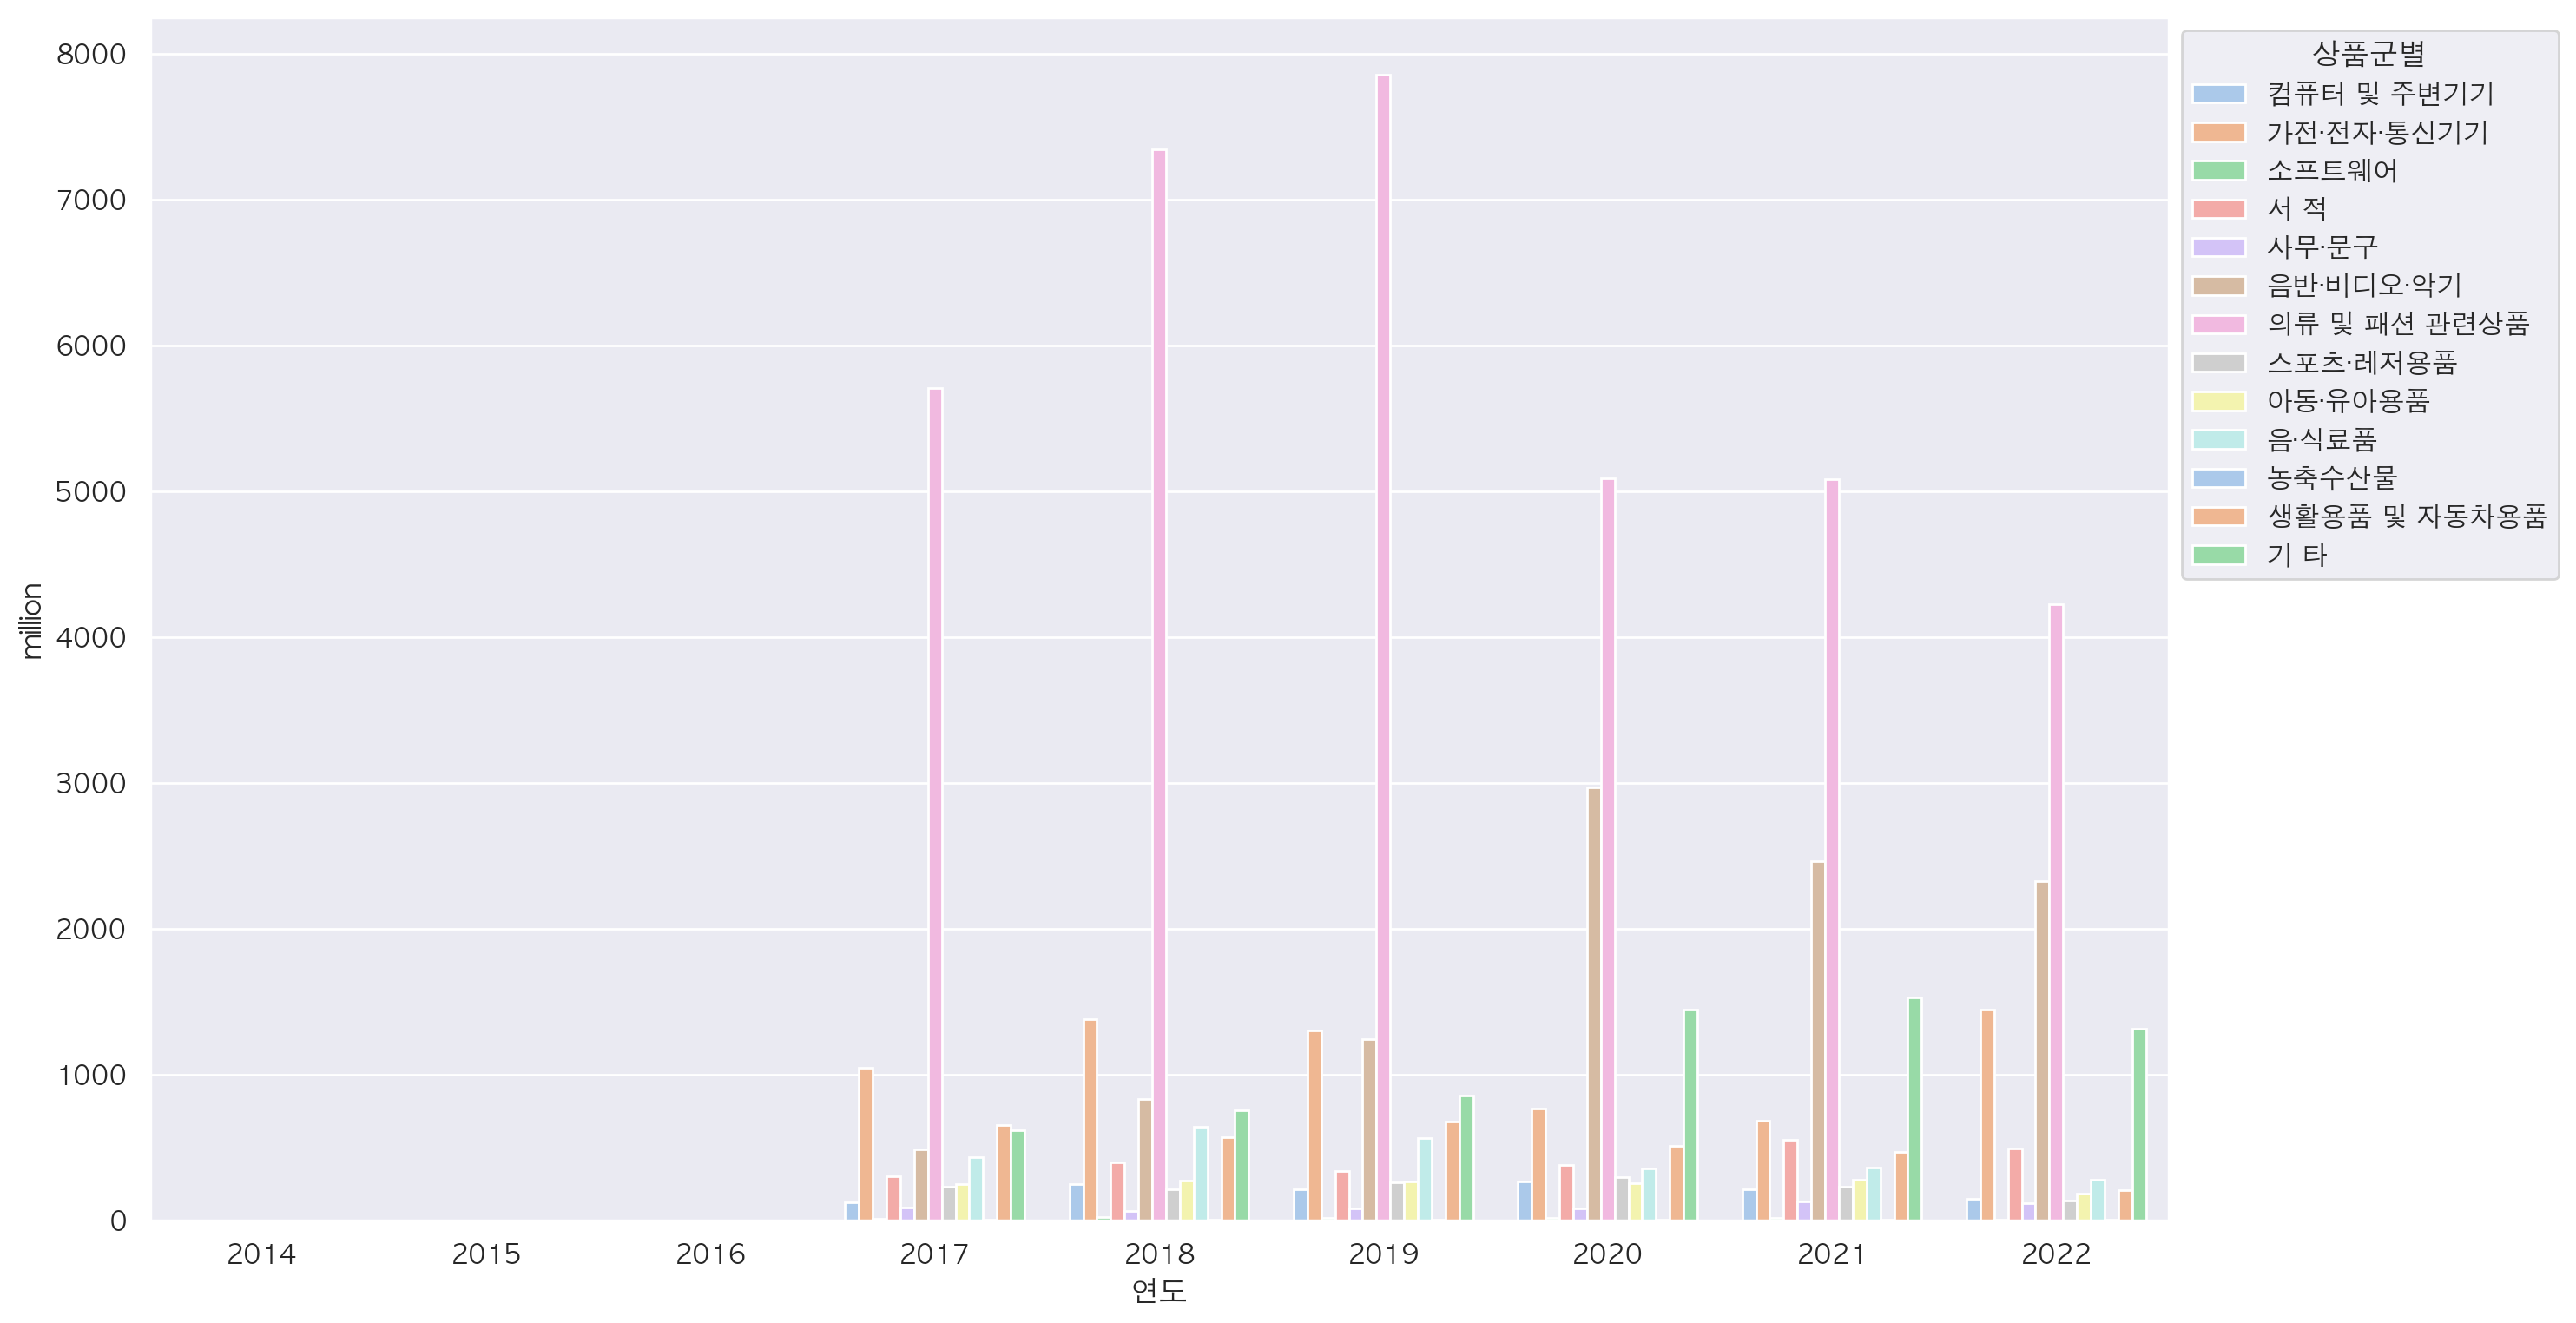

In [105]:
# 개별 상품군별 해외직접판매액 추이
plt.figure(figsize=(15,9))
ax = sns.barplot(data=df_sub, x='연도', y='million', hue='상품군별', errorbar=None, palette='pastel')

# 범례를 밖으로 빼고 싶은 경우,
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.move_legend(ax , "upper left", bbox_to_anchor=(1, 1))

In [111]:
df['쿼터'] = df['기간'].map(lambda period : period.split('.')[1])
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기,쿼터
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1,1/4
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1,1/4
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1,1/4
53,미국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1,1/4
55,미국,소프트웨어,면세점,2014.1/4,NaN,2014,1,1/4
...,...,...,...,...,...,...,...,...
15293,기타,농축수산물,면세점 이외,2022.2/4,0.0,2022,2,2/4
15295,기타,생활용품 및 자동차용품,면세점,2022.2/4,0.0,2022,2,2/4
15296,기타,생활용품 및 자동차용품,면세점 이외,2022.2/4,168.0,2022,2,2/4
15298,기타,기 타,면세점,2022.2/4,0.0,2022,2,2/4
